<a href="https://colab.research.google.com/github/SSInimgba/NLP/blob/master/NLP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Toolkits and Preprocessing Exercises

**bold text**## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [0]:
import nltk
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
pd.set_option('display.max_colwidth', -1)
data = pd.read_csv('cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healthy but they taste great and are so soft! I will definitely add these to my grocery list!
1,A1JAPP1CXRG57A,5,"Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day. For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively ""healthy"" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice. These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and contain 25g of fiber.<br /><br />While the calorie count may seem a bit high for one cookie, they are good sized, and 1 cookie per serving is certainly enough to satisfy.<br /><br />Because of their great taste and texture, kids will probably enjoy them also.<br /><br />If you like oatmeal raisin cookies, give these a try!"
2,A2Z9JNXPIEL2B9,5,"I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are so soft and tasty! I would definitely recommend these to someone who loves oatmeal, and even those like me who would probably pick a different flavor over this one."
3,A31CYJQO3FL586,5,"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/product/B007JFMH8M"">Quaker Soft Baked Oatmeal Cookie, Raisins, 8.8-Ounce (Pack of 12)</a>. Okay first of all I love Oatmeal Raisin cookies and this one was no exception. It was great!!! Soft n chewy, nice portion size and and as always a high quality product from Quaker Oats. Thanks to Quaker and Influenster to for including this in their Mom Voxbox. If you haven't tried it you need to and make sure to share it with the family."
4,A2KXQ2EKFF3K2G,5,"My kids loved these. I was very pleased to give my kids a quick on the go healthy snack before soccer and acne practice. They loved the flavor, I loved that its healthy."


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [0]:
#Number of reviews in total
number_of_reviews = len(data.reviews)
print("There are {0} reviews in total".format(number_of_reviews))

There are 913 reviews in total


In [0]:
#The percentage of the reviews

x = data.stars.value_counts(normalize = True) * 100
review_percentage = x.round(1)
review_percentage

5    68.3
4    23.8
3    6.1 
2    1.3 
1    0.4 
Name: stars, dtype: float64

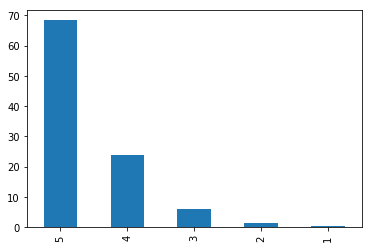

In [0]:
import matplotlib.pyplot as plt

review_percentage.plot(kind = 'bar');

There are more 5 star ratings in the dataset

In [0]:
#Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram

data['review_word_count'] = data['reviews'].str.len()
data['review_word_count'].describe()

count    913.000000 
mean     284.684556 
std      247.156401 
min      87.000000  
25%      146.000000 
50%      204.000000 
75%      324.000000 
max      3535.000000
Name: review_word_count, dtype: float64

In [0]:
data['review_word_count'].head(50)

0     135 
1     1316
2     261 
3     530 
4     169 
5     232 
6     166 
7     142 
8     900 
9     99  
10    225 
11    114 
12    521 
13    125 
14    230 
15    168 
16    341 
17    153 
18    232 
19    281 
20    493 
21    250 
22    149 
23    155 
24    146 
25    885 
26    134 
27    189 
28    318 
29    305 
30    170 
31    606 
32    268 
33    409 
34    174 
35    794 
36    337 
37    1002
38    213 
39    481 
40    324 
41    306 
42    681 
43    150 
44    1621
45    122 
46    270 
47    135 
48    845 
49    276 
Name: review_word_count, dtype: int64

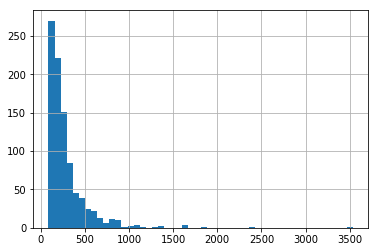

In [0]:
data['review_word_count'].hist(bins = 50);

Users are more likely to use lesser words, around 284 characters to review the cookies. 

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [0]:
#Making all the text lowercase
data['reviews_preprocessed'] = data['reviews'].str.replace('\d+', '') #remove digits
data['reviews_preprocessed'] = data['reviews_preprocessed'].str.lower() #turn uppercase to lowercase
data['reviews_preprocessed'] = data['reviews_preprocessed'].str.replace('<[^>]+>', ' ') #remove HTML tags
data['reviews_preprocessed'] = data['reviews_preprocessed'].str.replace('[^\w\s]','') #remove punctutiaton marks

from nltk.tokenize import word_tokenize

data['reviews_preprocessed'] = data['reviews_preprocessed'].apply(word_tokenize) #Tokenize the reviews into words
data.head()

,user_id,stars,reviews,review_word_count,reviews_preprocessed
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healthy but they taste great and are so soft! I will definitely add these to my grocery list!,135,"[i, love, these, cookies, not, only, are, they, healthy, but, they, taste, great, and, are, so, soft, i, will, definitely, add, these, to, my, grocery, list]"
1,A1JAPP1CXRG57A,5,"Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day. For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively ""healthy"" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice. These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and contain 25g of fiber.<br /><br />While the calorie count may seem a bit high for one cookie, they are good sized, and 1 cookie per serving is certainly enough to satisfy.<br /><br />Because of their great taste and texture, kids will probably enjoy them also.<br /><br />If you like oatmeal raisin cookies, give these a try!",1316,"[quaker, soft, baked, oatmeal, cookies, with, raisins, are, a, delicious, treat, great, for, anytime, of, day, for, example, at, breakfast, i, had, one, with, a, large, banana, and, a, cup, of, coffee, and, felt, id, had, a, relatively, healthy, start, to, the, day, the, next, day, at, lunch, following, a, tuna, sandwich, i, had, one, with, a, glass, of, milk, and, was, satisfied, enough, to, not, need, a, snack, before, dinner, at, the, following, night, after, dinner, i, had, one, with, the, remainder, of, my, glass, of, wine, delicious, and, again, didnt, feel, the, need, to, snack, later, in, the, ...]"
2,A2Z9JNXPIEL2B9,5,"I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are so soft and tasty! I would definitely recommend these to someone who loves oatmeal, and even those like me who would probably pick a different flavor over this one.",261,"[i, am, usually, not, a, huge, fan, of, oatmeal, cookies, but, these, literally, melt, in, your, mouth, they, are, so, soft, and, tasty, i, would, definitely, recommend, these, to, someone, who, loves, oatmeal, and, even, those, like, me, who, would, probably, pick, a, different, flavor, over, this, one]"
3,A31CYJQO3FL586,5,"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/product/B007JFMH8M"">Quaker Soft Baked Oatmeal Cookie, Raisins, 8.8-Ounce (Pack of 12)</a>. Okay first of all I love Oatmeal Raisin cookies and this one was no exception. It was great!!! Soft n chewy, nice portion size and and as always a high quality product from Quaker Oats. Thanks to Quaker and Influenster to for including this in their Mom Voxbox. If you haven't tried it you need to and make sure to share it with the family.",530,"[i, participated, in, a, product, review, that, included, a, sample, of, quaker, soft, baked, oatmeal, cookie, raisins, ounce, pack, of, okay, first, of, all, i, love, oatmeal, raisin, cookies, and, this, one, was, no, exception, it, was, great, soft, n, chewy, nice, portion, size, and, and, as, always, a, high, quality, product, from, quaker, oats, thanks, to, quaker, and, influenster, to, for, including, this, in, their, mom, voxbox, if, you, havent, tried, it, you, need, to, and, make, sure, to, share, i

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#most common words 
stopwords = nltk.corpus.stopwords.words('english')
data['reviews_preprocessed']= data['reviews_preprocessed'].apply(lambda x: [item for item in x if item not in stopwords])
data.head()

,user_id,stars,reviews,review_word_count,reviews_preprocessed
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healthy but they taste great and are so soft! I will definitely add these to my grocery list!,135,"[love, cookies, healthy, taste, great, soft, definitely, add, grocery, list]"
1,A1JAPP1CXRG57A,5,"Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day. For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively ""healthy"" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice. These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and contain 25g of fiber.<br /><br />While the calorie count may seem a bit high for one cookie, they are good sized, and 1 cookie per serving is certainly enough to satisfy.<br /><br />Because of their great taste and texture, kids will probably enjoy them also.<br /><br />If you like oatmeal raisin cookies, give these a try!",1316,"[quaker, soft, baked, oatmeal, cookies, raisins, delicious, treat, great, anytime, day, example, breakfast, one, large, banana, cup, coffee, felt, id, relatively, healthy, start, day, next, day, lunch, following, tuna, sandwich, one, glass, milk, satisfied, enough, need, snack, dinner, following, night, dinner, one, remainder, glass, wine, delicious, didnt, feel, need, snack, later, evening, cookie, individually, packaged, texture, soft, moist, right, amount, sweetness, natural, flavors, used, making, cinnamon, spice, flavorings, give, cookies, real, oldfashioned, homemade, taste, nutritionally, cookies, calories, g, saturated, fat, mg, sodium, g, sugar, also, g, protein, contain, g, fiber, calorie, count, may, seem, bit, high, one, cookie, good, sized, ...]"
2,A2Z9JNXPIEL2B9,5,"I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are so soft and tasty! I would definitely recommend these to someone who loves oatmeal, and even those like me who would probably pick a different flavor over this one.",261,"[usually, huge, fan, oatmeal, cookies, literally, melt, mouth, soft, tasty, would, definitely, recommend, someone, loves, oatmeal, even, like, would, probably, pick, different, flavor, one]"
3,A31CYJQO3FL586,5,"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/product/B007JFMH8M"">Quaker Soft Baked Oatmeal Cookie, Raisins, 8.8-Ounce (Pack of 12)</a>. Okay first of all I love Oatmeal Raisin cookies and this one was no exception. It was great!!! Soft n chewy, nice portion size and and as always a high quality product from Quaker Oats. Thanks to Quaker and Influenster to for including this in their Mom Voxbox. If you haven't tried it you need to and make sure to share it with the family.",530,"[participated, product, review, included, sample, quaker, soft, baked, oatmeal, cookie, raisins, ounce, pack, okay, first, love, oatmeal, raisin, cookies, one, exception, great, soft, n, chewy, nice, portion, size, always, high, quality, product, quaker, oats, thanks, quaker, influenster, including, mom, voxbox, havent, tried, need, make, sure, share, family]"
4,A2KXQ2EKFF3K2G,5,"My kids loved these. I was very pleased to give my kids a quick on the go healthy snack before soccer and acne practice. They loved the flavor, I loved that its healthy.",

In [0]:
#most common words
from collections import Counter

counter = Counter()
#df = pd.DataFrame({'Text': values})
_ = data['reviews_preprocessed'].apply(lambda x: counter.update(x))

counter.most_common(50) 

[('cookies', 838),
 ('cookie', 831),
 ('soft', 693),
 ('oatmeal', 479),
 ('good', 347),
 ('quaker', 329),
 ('like', 295),
 ('taste', 292),
 ('love', 289),
 ('great', 288),
 ('influenster', 242),
 ('one', 235),
 ('loved', 228),
 ('baked', 225),
 ('raisins', 196),
 ('delicious', 191),
 ('kids', 189),
 ('try', 189),
 ('received', 186),
 ('really', 186),
 ('chewy', 184),
 ('raisin', 175),
 ('would', 170),
 ('snack', 169),
 ('box', 167),
 ('buy', 145),
 ('go', 136),
 ('mom', 128),
 ('definitely', 125),
 ('sample', 119),
 ('product', 116),
 ('got', 115),
 ('flavor', 108),
 ('even', 107),
 ('yummy', 107),
 ('dont', 104),
 ('moist', 101),
 ('voxbox', 100),
 ('get', 98),
 ('homemade', 98),
 ('eat', 94),
 ('healthy', 90),
 ('little', 90),
 ('whole', 89),
 ('sweet', 85),
 ('made', 85),
 ('also', 84),
 ('tried', 81),
 ('family', 80),
 ('fresh', 78)]

0

In [0]:



# generate DF out of Counter
rslt = pd.DataFrame(Counter(data['reviews_preprocessed']).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
#word_dist = nltk.FreqDist()
#data.reviews_preprocessed.values

TypeError: ignored

## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
#Perform parts of speech tagging
pos_list = []
for i in data['reviews_preprocessed']:
  p_o_s = nltk.pos_tag(i)
  pos_list.append(p_o_s)
pos_list  

[[('love', 'VB'),
  ('cookies', 'NNS'),
  ('healthy', 'JJ'),
  ('taste', 'NN'),
  ('great', 'JJ'),
  ('soft', 'JJ'),
  ('definitely', 'RB'),
  ('add', 'VBP'),
  ('grocery', 'JJ'),
  ('list', 'NN')],
 [('quaker', 'NN'),
  ('soft', 'JJ'),
  ('baked', 'VBD'),
  ('oatmeal', 'JJ'),
  ('cookies', 'NNS'),
  ('raisins', 'VBZ'),
  ('delicious', 'JJ'),
  ('treat', 'NN'),
  ('great', 'JJ'),
  ('anytime', 'JJ'),
  ('day', 'NN'),
  ('example', 'NN'),
  ('breakfast', 'NN'),
  ('one', 'CD'),
  ('large', 'JJ'),
  ('banana', 'NN'),
  ('cup', 'NN'),
  ('coffee', 'NN'),
  ('felt', 'VBD'),
  ('id', 'JJ'),
  ('relatively', 'RB'),
  ('healthy', 'JJ'),
  ('start', 'VBP'),
  ('day', 'NN'),
  ('next', 'JJ'),
  ('day', 'NN'),
  ('lunch', 'NN'),
  ('following', 'VBG'),
  ('tuna', 'NN'),
  ('sandwich', 'JJ'),
  ('one', 'CD'),
  ('glass', 'NN'),
  ('milk', 'NN'),
  ('satisfied', 'VBD'),
  ('enough', 'JJ'),
  ('need', 'NN'),
  ('snack', 'NN'),
  ('dinner', 'NN'),
  ('following', 'VBG'),
  ('night', 'NN'),
  ('dinne

In [0]:
#Perform stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()


for x in range(len(data['reviews_preprocessed'])):
  for i in data['reviews_preprocessed'][0]:
    stem = ps.stem(i)
    print(i + "  :  " + stem) 

love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love  :  love
cookies  :  cooki
healthy  :  healthi
taste  :  tast
great  :  great
soft  :  soft
definitely  :  definit
add  :  add
grocery  :  groceri
list  :  list
love

## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?